In [116]:
# SCRIPT PARA GRAFICADO Y ANALISIS DE RESULTADOS INVERSION CONJUNTA 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
# Correr mediante comandos magicos el script en bash para ejecutar el software (Parametros ya deben estar configurados en el scritp de modelado o inversion)
%time %system ./run_inversion.sh

CPU times: user 4.73 ms, sys: 3.15 ms, total: 7.88 ms
Wall time: 45 s


[' Total number of data:           400',
 ' Total number of parameters:          4000']

Cantidad de datos (30, 5)
<bound method NDFrame.head of      iteracion  convergencia%_gv  convergencia%_mg  RMS_gv  RMS_mg
0            1       825970.4375       186447.2656  0.5084  0.6103
1            2           69.4820          596.4990  0.1496  0.3417
2            3         1229.4528          518.0646  0.1064  0.1983
3            4         1455.5815         1148.2115  0.0850  0.1250
4            5          599.7773         4642.7793  0.0649  0.0904
5            6          303.2815          685.1206  0.0499  0.0688
6            7          304.9916          782.5525  0.0440  0.0640
7            8          621.8777          514.0501  0.0440  0.0547
8            9          334.5847          419.9291  0.0404  0.0484
9           10          801.3394         1541.8137  0.0398  0.0462
10          11         1650.5137          449.8270  0.0387  0.0463
11          12         1504.8992          178.8007  0.0412  0.0474
12          13           63.5710          179.1764  0.0373  0.0482
13    

Text(0.5, 0.98, 'Gráficos de Ajuste')

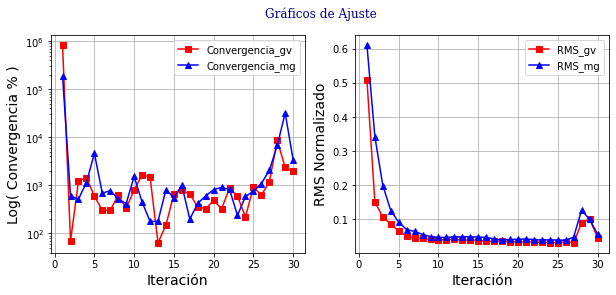

In [13]:
# Graficado de error de ajuste RMS y convergencias

#Lectura datos
filename = 'output_misfit_jointGram.txt'
error = pd.read_csv(filename, sep=',', header=0)
print('Cantidad de datos',error.shape)
print(error.head)
#print(error.iloc[:,0])

#Seleccion de columnas
iteracion = error.iloc[:,0]
conv_gv = error.iloc[:,1]
conv_mg = error.iloc[:,2]
rms_gv = error.iloc[:,3]
rms_mg = error.iloc[:,4]

# Gráfico
def add_value_label(aa,x_list,y_list):
    for i in range(1, len(x_list)+1):
        ax[aa].text(i,y_list[i-1],y_list[i-1], ha="center")


fig, ax = plt.subplots(1, 2, figsize=(10,4), sharex=True)

ax[0].semilogy(iteracion, conv_gv, 'rs-', label="Convergencia_gv")
ax[0].semilogy(iteracion, conv_mg, 'b^-', label="Convergencia_mg")
ax[0].legend()
ax[0].grid(True)
ax[0].set_xlabel("Iteración", size = 14)
ax[0].set_ylabel("Log( Convergencia % )", size = 14)
#add_value_label(0,iteracion, conv_gv)
#add_value_label(0,iteracion, conv_mg)


ax[1].plot(iteracion, rms_gv, 'rs-', label="RMS_gv")
ax[1].plot(iteracion, rms_mg, 'b^-', label="RMS_mg")
ax[1].legend()
ax[1].grid(True)
ax[1].set_xlabel("Iteración", size = 14)
ax[1].set_ylabel("RMS Normalizado", size = 14)
#add_value_label(1,iteracion, rms_gv)
#add_value_label(1,iteracion, rms_mg)

fig.suptitle("Gráficos de Ajuste", 
          fontdict={'family': 'serif', 
                    'color' : 'darkblue',
                    'weight': 'bold',
                    'size': 18})
#plt.show()

In [5]:
iteraciones = 30

<ipython-input-15-c0ee4097bde2>:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


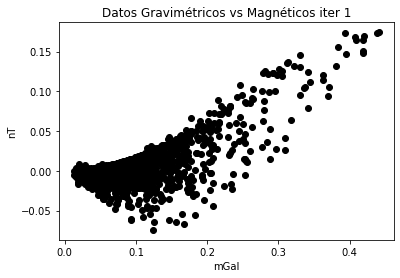

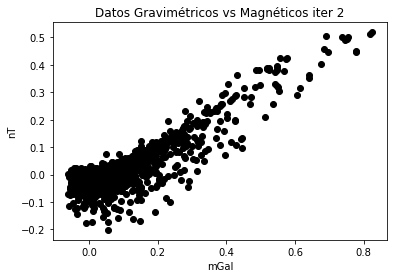

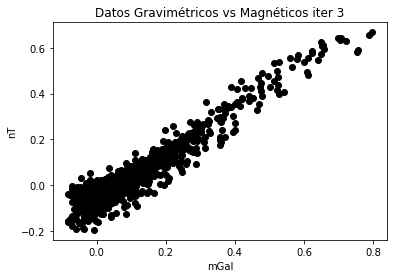

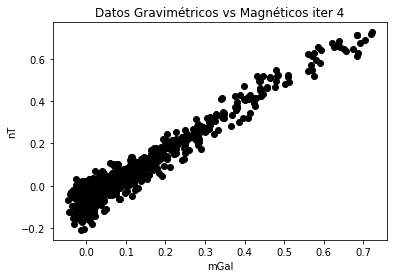

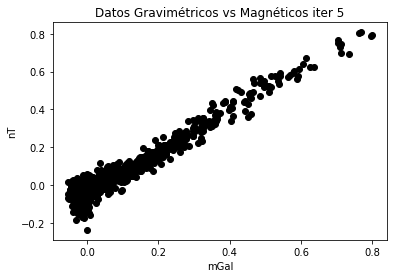

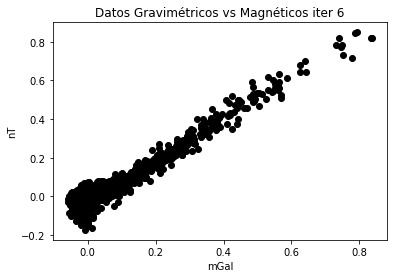

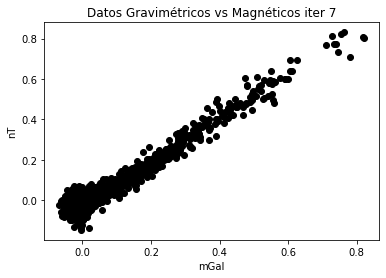

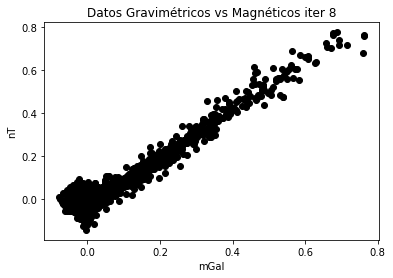

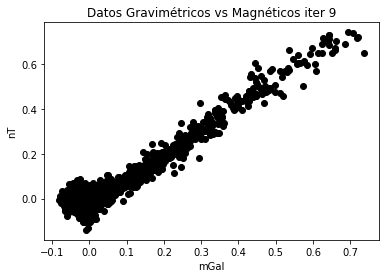

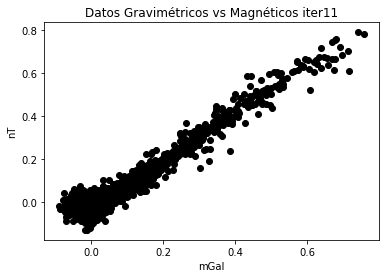

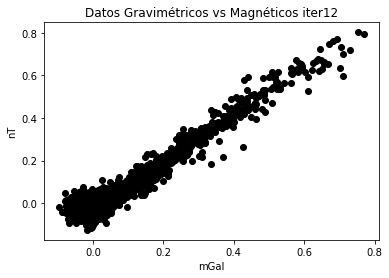

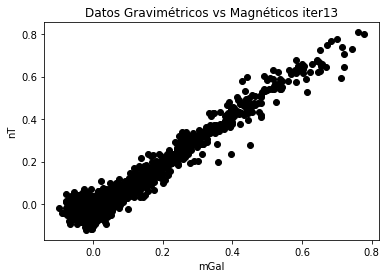

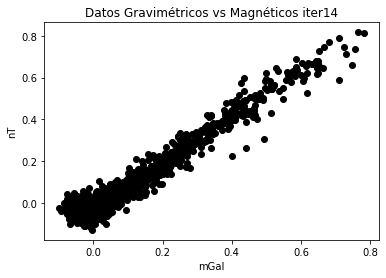

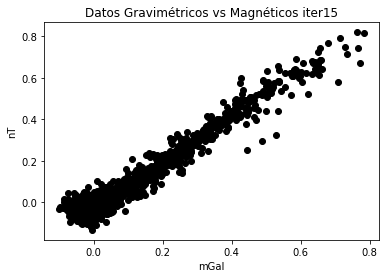

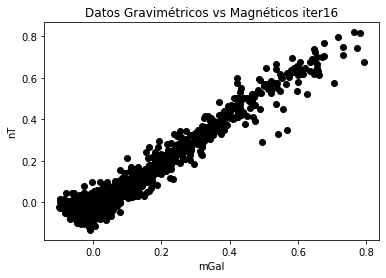

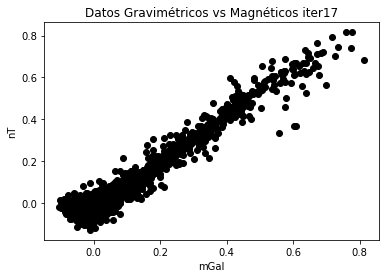

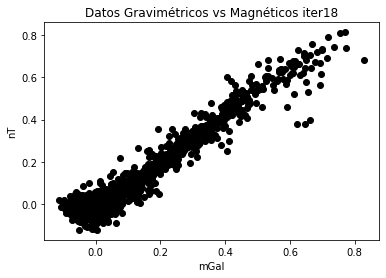

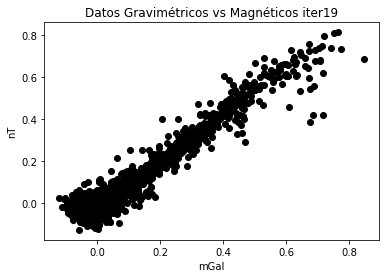

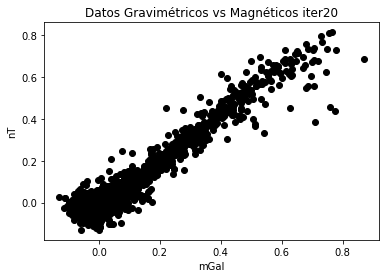

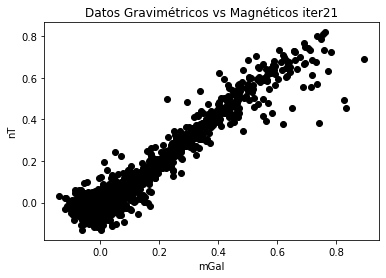

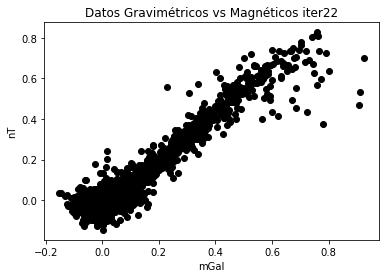

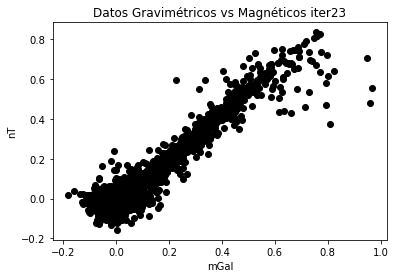

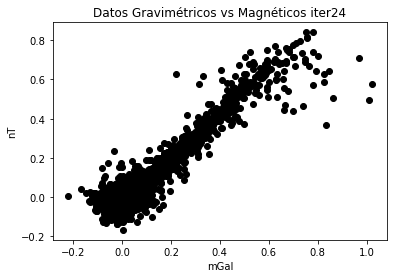

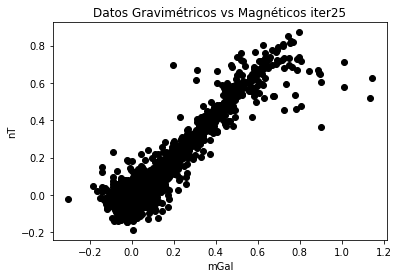

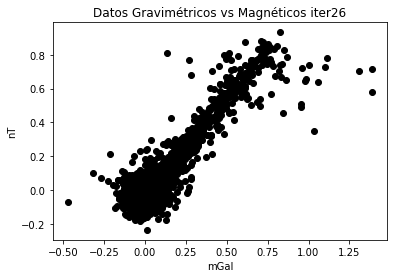

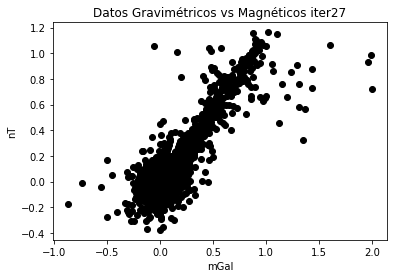

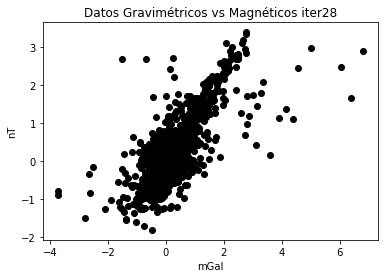

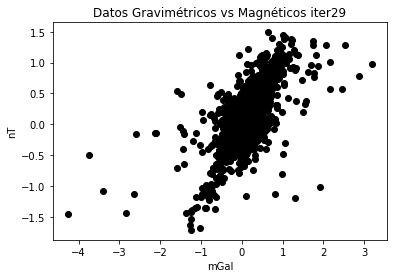

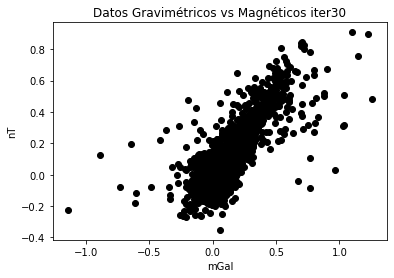

In [15]:
# Graficado de datos gravimétricos vs magnéticos en scatter

for i in range(1,10):
    #Gravimetria 
    filename1 = f'output_jointGram_gv_minv_iter {i}.csv'
    gv = pd.read_csv(filename1, sep=',', header=0, usecols=[3])
    #print(gv.head)
    
    #Magnetometria 
    filename2 = f'output_jointGram_mg_minv_iter {i}.csv'
    mg = pd.read_csv(filename2, sep=',', header=0, usecols=[3])
    #print(mg.head)
    
    fig = plt.figure()
    plt.scatter(gv, mg, color="black")
    plt.title(f"Datos Gravimétricos vs Magnéticos iter {i}")
    plt.xlabel('mGal')
    plt.ylabel('nT')
    #plt.show()
    
for i in range(11,iteraciones+1):
    #Gravimetria 
    filename1 = f'output_jointGram_gv_minv_iter{i}.csv'
    gv = pd.read_csv(filename1, sep=',', header=0, usecols=[3])
    #print(gv.head)
    
    #Magnetometria 
    filename2 = f'output_jointGram_mg_minv_iter{i}.csv'
    mg = pd.read_csv(filename2, sep=',', header=0, usecols=[3])
    #print(mg.head)
    
    fig = plt.figure()
    plt.scatter(gv, mg, color="black")
    plt.title(f"Datos Gravimétricos vs Magnéticos iter{i}")
    plt.xlabel('mGal')
    plt.ylabel('nT')
    #plt.show()

<bound method NDFrame.head of       x[m]   y[m]  gv[mGal]
0     25.0   25.0    0.1694
1     25.0   75.0    0.1183
2     25.0  125.0    0.1076
3     25.0  175.0    0.2031
4     25.0  225.0    0.1602
..     ...    ...       ...
395  975.0  775.0    0.2068
396  975.0  825.0    0.2087
397  975.0  875.0    0.1663
398  975.0  925.0    0.1488
399  975.0  975.0    0.1647

[400 rows x 3 columns]>
<bound method NDFrame.head of      Anomaly[mGal]
0           0.1986
1           0.2333
2           0.2667
3           0.3014
4           0.3286
..             ...
395         0.4263
396         0.3810
397         0.3323
398         0.2855
399         0.2370

[400 rows x 1 columns]>
<bound method NDFrame.head of      Anomaly[mGal]
0          0.06270
1          0.04838
2          0.04818
3          0.06628
4          0.06911
..             ...
395        0.20340
396        0.16840
397        0.13170
398        0.11370
399        0.10930

[400 rows x 1 columns]>
<bound method NDFrame.head of      Anomaly[

FileNotFoundError: [Errno 2] No such file or directory: 'output_jointGram_gv_anomaly_iter 10.csv'

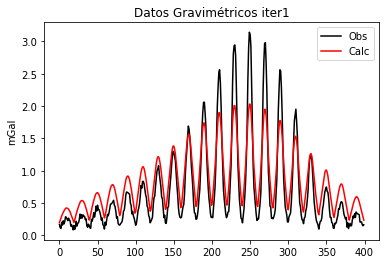

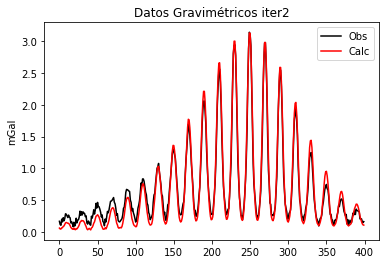

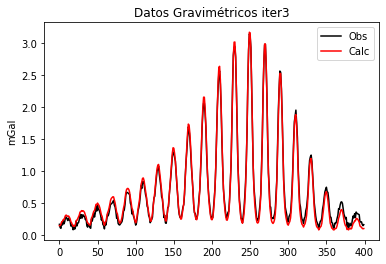

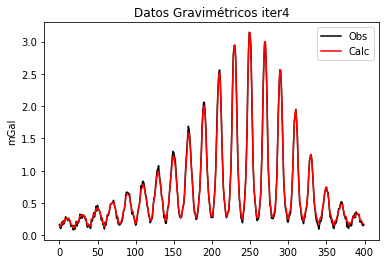

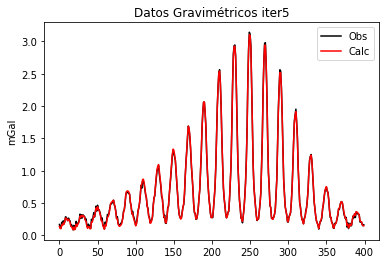

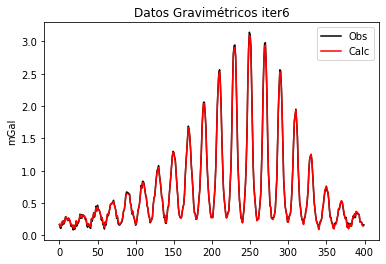

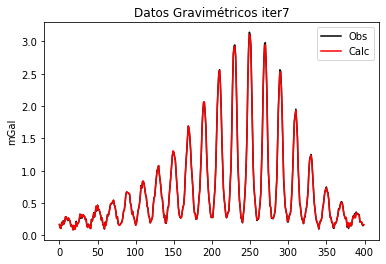

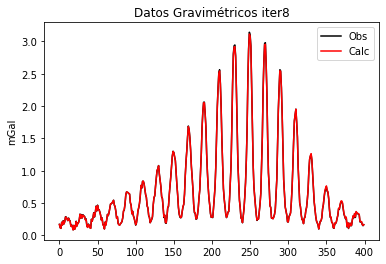

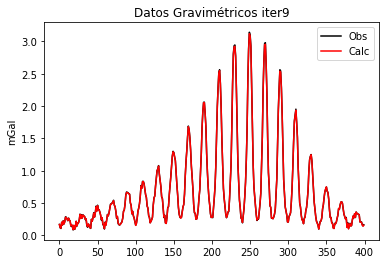

In [31]:
# Graficado de datos campo vs datos calculados, con barras de desviacion standard

#Gravimetria
#Lectura datos
filename1 = 'input_d_gv.csv'
#d_gv = pd.read_csv(filename1, sep=',', header=0, usecols=['x_utm', 'y_utm', 'anom_CB_residual'])
d_gv = pd.read_csv(filename1, sep=',', header=0, usecols=[0,1,3])
print(d_gv.head)

#Seleccion de columnas
x = d_gv.iloc[:,0]
y = d_gv.iloc[:,1]
d = pd.Series(d_gv.iloc[:,2])

num = np.arange(0, len(d), 1, dtype=int)

for i in range(1,iteraciones):
    #Desajuste de datos
    filename2 = f'output_jointGram_gv_anomaly_iter {i}.csv'
    iter1 = pd.read_csv(filename2, sep=',', header=0, usecols=['Anomaly[mGal]'])
    print(iter1.head)

    p = pd.Series(iter1.iloc[:,0])
    misfit = d-p

    # Crear figura 3D
    ########################################
    #%matplotlib notebook #figura interactiva
    #fig = plt.figure(figsize = (10, 8))
    #ax = plt.axes(projection ="3d")

    # Crear gráfico
    #ax.scatter3D(x,y,0, s=20, color='black')
    #ax.scatter3D(x,y,misfit, s=50, color='red')

    #plt.title("Datos Gravimétricos")
    #ax.set_xlabel('x_utm')
    #ax.set_ylabel('y_utm')
    #ax.set_zlabel('mGal')
    #punto de vista
    #ax.view_init(0,90)

    # desactivar formato cientifico en etiquetas
    #current_values = plt.gca().get_yticks()
    #plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])

    # ejes proporcionales
    #ax.set_aspect('equal', adjustable='box')
    #plt.axis("equal")
    ########################################

    fig = plt.figure()
    plt.plot(num, d, 'k-')
    plt.plot(num, p, 'r-')
    legend = plt.legend(['Obs','Calc'])
    plt.title(f"Datos Gravimétricos iter{i}")
    plt.ylabel('mGal')
    #plt.show()

<bound method NDFrame.head of       x[m]   y[m]  mg[nT]
0     25.0   25.0   9.792
1     25.0   75.0   6.743
2     25.0  125.0   5.990
3     25.0  175.0  21.690
4     25.0  225.0  20.450
..     ...    ...     ...
395  975.0  775.0 -14.230
396  975.0  825.0  -3.100
397  975.0  875.0   1.978
398  975.0  925.0   3.198
399  975.0  975.0  -4.434

[400 rows x 3 columns]>
<bound method NDFrame.head of      Anomaly[nT]
0      -0.000308
1      -0.000394
2      -0.000452
3      -0.000192
4      -0.000184
..           ...
395     0.000397
396     0.000419
397     0.000419
398     0.000355
399     0.000212

[400 rows x 1 columns]>
<bound method NDFrame.head of      Anomaly[nT]
0         -2.597
1         -2.659
2         -2.485
3         -2.086
4         -1.692
..           ...
395        3.211
396        3.037
397        2.683
398        2.337
399        2.099

[400 rows x 1 columns]>
<bound method NDFrame.head of      Anomaly[nT]
0         -2.598
1         -2.660
2         -2.486
3         -2.087


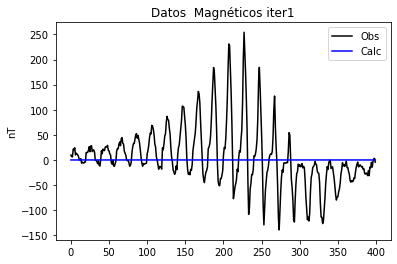

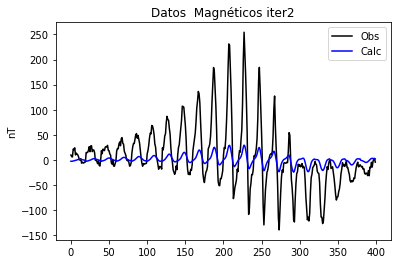

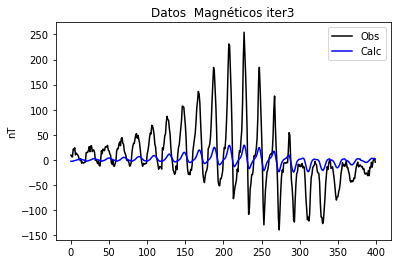

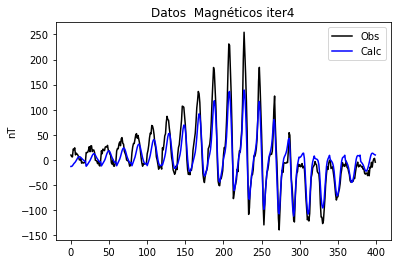

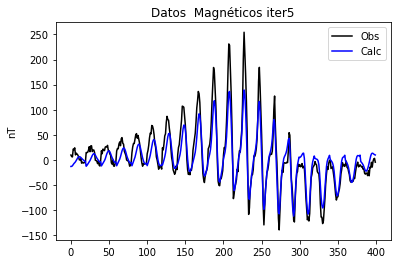

In [10]:
#Magnetometria
#Lectura datos
filename3 = 'input_d_mg.csv'
#d_mg = pd.read_csv(filename3, sep=',', header=0, usecols=['x_utm', 'y_utm', 'anom_CT_residual'])
d_mg = pd.read_csv(filename3, sep=',', header=0, usecols=[0,1,3])
print(d_mg.head)

#Seleccion de columnas
x = d_mg.iloc[:,0]
y = d_mg.iloc[:,1]
d = pd.Series(d_mg.iloc[:,2])

num = np.arange(0, len(d), 1, dtype=int)

for i in range(1,iteraciones):
    #Desajuste de datos
    filename4 = f'output_jointGram_mg_anomaly_iter {i}.csv'
    iter1 = pd.read_csv(filename4, sep=',', header=0, usecols=['Anomaly[nT]'])
    print(iter1.head)

    p = pd.Series(iter1.iloc[:,0])
    misfit = d-p


    # Crear figura 3D
    ########################################
    #%matplotlib notebook #figura interactiva
    #fig = plt.figure(figsize = (10, 8))
    #ax = plt.axes(projection ="3d")

    # Crear gráfico
    #ax.scatter3D(x,y,0, s=20, color='black')
    #ax.scatter3D(x,y,misfit, s=50, color='red')

    #plt.title("Datos Magnéticos")
    #ax.set_xlabel('x_utm')
    #ax.set_ylabel('y_utm')
    #ax.set_zlabel('nT')
    #punto de vista
    #ax.view_init(0,90)

    # desactivar formato cientifico en etiquetas
    #current_values = plt.gca().get_yticks()
    #plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])

    # ejes proporcionales
    #ax.set_aspect('equal', adjustable='box')
    #plt.axis("equal")
    ########################################

    fig = plt.figure()
    plt.plot(num, d, 'k-')
    plt.plot(num, p, 'b-')
    legend = plt.legend(['Obs','Calc'])
    plt.title(f"Datos  Magnéticos iter{i}")
    plt.ylabel('nT')
    #plt.show()

# Graficado de dominios de inversion 3D

#Gravimetria
for i in range(1,5):
    #Desajuste de datos
    filename2 = f'output_jointGram_gv_minv_c1_iter{i}.csv'
    iter1 = pd.read_csv(filename2, sep=',', header=0)
    print(iter1.head)

    #Seleccion de columnas
    x = iter1.iloc[:,0]
    y = iter1.iloc[:,1]
    z = iter1.iloc[:,2]
    p = pd.Series(iter1.iloc[:,3])

    # Crear figura
    #%matplotlib notebook #figura interactiva
    fig = plt.figure()
    ax = fig.add_subplot(111,projection='3d')

    # Crear gráfico
    ax.scatter3D(x,y,z, s=20, cmap='rainbow')
    #ax.scatter(x,y,z, c=p, cmap='rainbow')

    plt.title("Datos Gravimétricos")
    ax.set_xlabel('x_utm')
    ax.set_ylabel('y_utm')
    ax.set_zlabel('mGal')
    
    #punto de vista
    ax.view_init(0,90)
    #plt.axis("equal")

#cambiar extension de archivos de salida de .csv a .xyz y luego convertirlos a voxel en Geosoft.

In [122]:
# Ejemplo graficado usando extension de desarrollador de voxler en Geosoft
#import geosoft.gxpy.gx as gx
#import geosoft.gxpy.view as gxview
#import geosoft.gxpy.group as gxgroup
#import geosoft.gxpy.vox as gxvox
#import geosoft.gxpy.vox_display as gxvoxd
#import geosoft.gxpy.viewer as gxviewer
#import geosoft.gxpy.utility as gxu
#import geosoft.gxpy.map as gxmap
#import geosoft.gxpy.surface as gxsurf
#from IPython.display import Image
#import numpy as np

#gxc = gx.GXpy()

#url = 'https://github.com/GeosoftInc/gxpy/raw/9.3.1/examples/data/'
#vox_file = 'rjsmith_voxi_density.geosoft_voxel'
#gxu.url_retrieve(url + vox_file)
#gxu.url_retrieve(url + vox_file + '.xml')
#vectorvox_file = 'mvi.geosoft_vectorvoxel'
#gxu.url_retrieve(url + vectorvox_file)
#gxu.url_retrieve(url + vectorvox_file + '.xml')